In [52]:
pwd

'/content/Connector_dataset'

In [54]:
!mkdir Data

In [55]:
cd Data

/content/Connector_dataset/Data


In [4]:
!pip install detecto

In [5]:
import torch
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

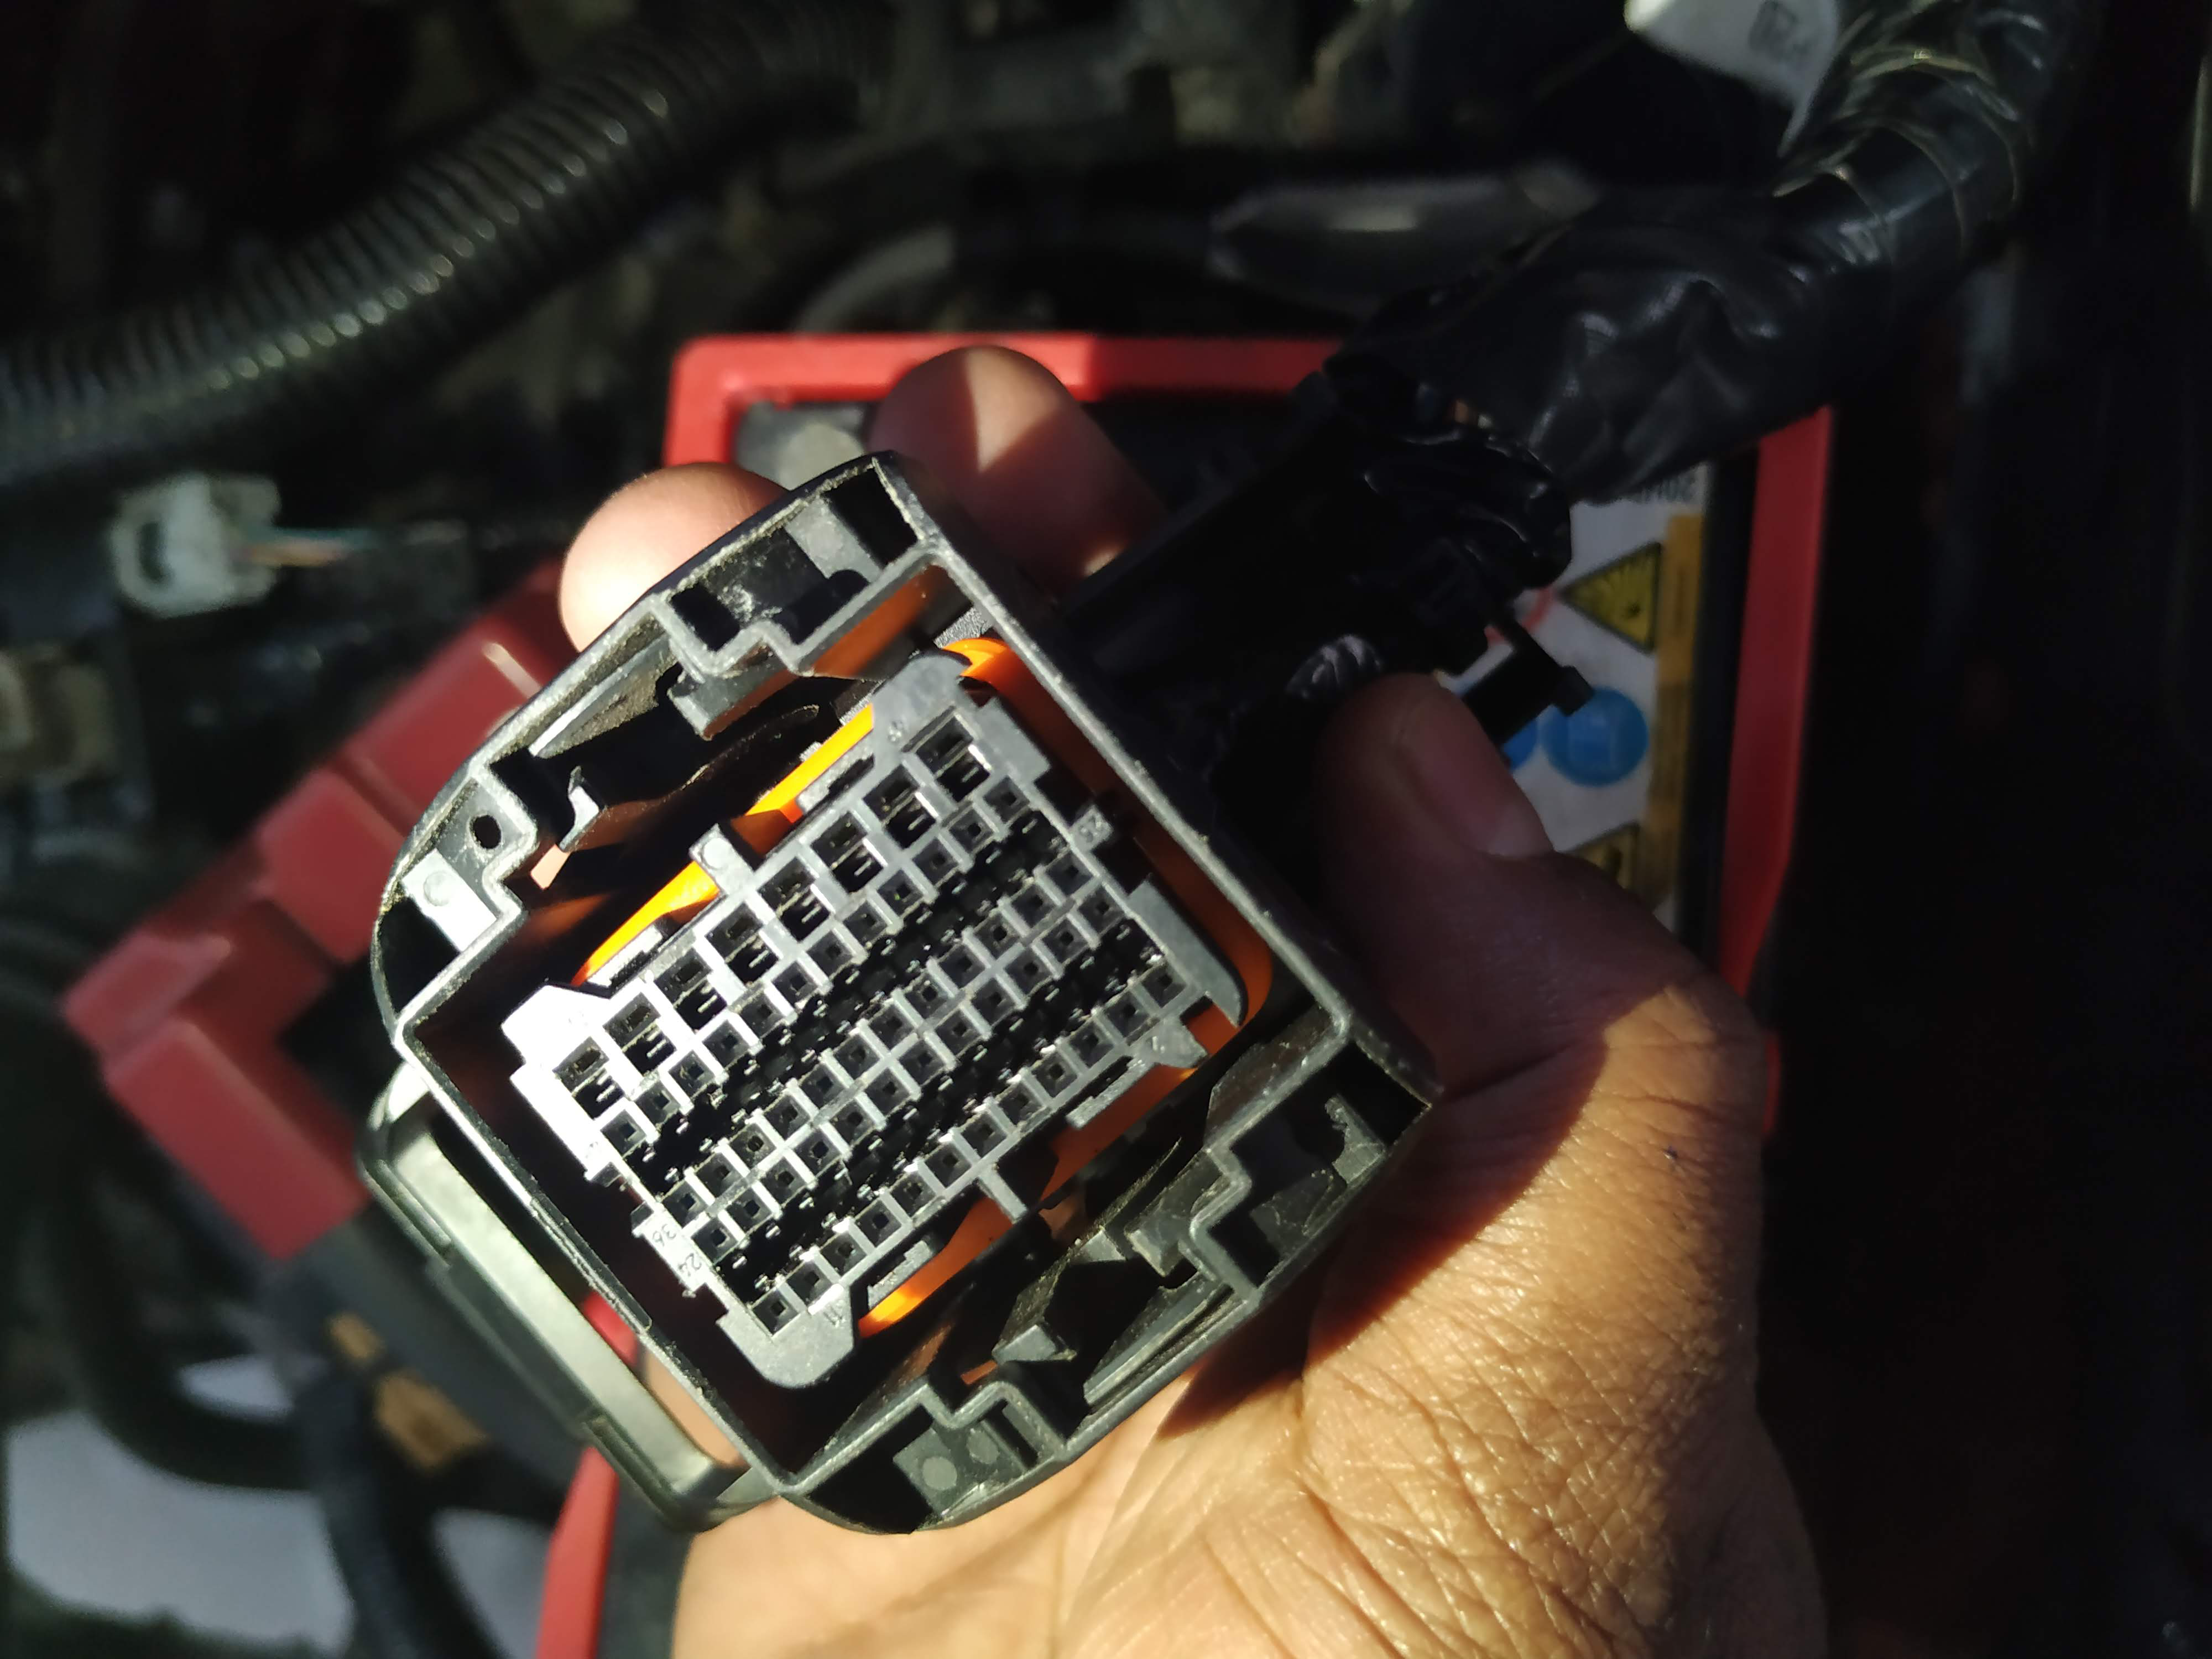

In [57]:
from PIL import Image
img = Image.open("/content/Connector_dataset/Train_images/IMG1.jpg")
img

In [43]:
    Train_dataset = core.Dataset('/content/Connector_dataset/Train_images')
    Test_dataset = core.Dataset('/content/Connector_dataset/Test_images')
    loader = core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
    model = core.Model(['Connector'])
    losses = model.fit(loader, Test_dataset, epochs=15, lr_step_size=5, learning_rate=0.001, verbose=True)


Epoch 1 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:12<00:00,  1.61s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


Loss: 0.40171104669570923
Epoch 2 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:14<00:00,  1.82s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


Loss: 0.26559142768383026
Epoch 3 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:12<00:00,  1.50s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.10it/s]


Loss: 0.24492386480172476
Epoch 4 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.03it/s]


Loss: 0.2306320071220398
Epoch 5 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.69s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


Loss: 0.23986788590749106
Epoch 6 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:14<00:00,  1.78s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


Loss: 0.23136859138806662
Epoch 7 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


Loss: 0.23828273018201193
Epoch 8 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:12<00:00,  1.55s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


Loss: 0.2349251757065455
Epoch 9 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


Loss: 0.21902892490228018
Epoch 10 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.70s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.15it/s]


Loss: 0.2228450228770574
Epoch 11 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:12<00:00,  1.62s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


Loss: 0.22080600758393606
Epoch 12 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.64s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.24it/s]


Loss: 0.22395493586858115
Epoch 13 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.69s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.13it/s]


Loss: 0.22284060219923654
Epoch 14 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.70s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.05it/s]


Loss: 0.23073969781398773
Epoch 15 of 15
Begin iterating over training dataset


100%|██████████| 8/8 [00:13<00:00,  1.71s/it]


Begin iterating over validation dataset


100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

Loss: 0.23060844341913858


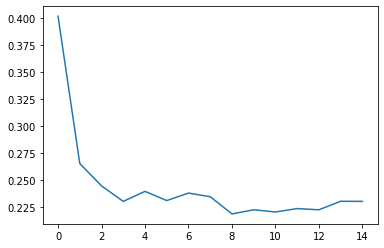

In [44]:
plt.plot(losses)
plt.show()

In [63]:
image = utils.read_image('/content/Connector_dataset/Train_images/IMG7.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
# show_labeled_image(image, boxes, labels)

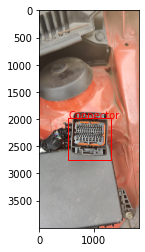

In [65]:
thresh=0.5
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

In [51]:
model.save('model_weights_latest2.pth')
model = core.Model.load('model_weights.pth', ['Connector'])